# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Putu Pramodia Suka Pratama
- **Email:** pramodia31@gmail.com
- **ID Dicoding:** pramodia31

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh hari libur dan hari kerja terhadap rata-rata jumlah penyewaan sepeda?
- Kapan jam puncak penyewaan sepeda pada hari kerja?
- Bagaimana pengaruh kondisi cuaca terhadap rata-rata jumlah penyewaan sepeda?
- Bagaimana pengaruh feeling temperature terhadap rata-rata jumlah penyewaan sepeda oleh pengguna casual pada tingkat harian?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Memuat data day.csv dan hour.csv ke dalam dataframe day_df dan hour_df

#### Day

In [2]:
day_df = pd.read_csv(r"C:\Users\Pramodia Suka\Notebook\Bangkit\Analisis Data Python\Bike-sharing-dataset\day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


#### Hour

In [3]:
hour_df = pd.read_csv(r"C:\Users\Pramodia Suka\Notebook\Bangkit\Analisis Data Python\Bike-sharing-dataset\hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Data day.csv berhasil dimuat ke dalam day_df. day_df terdiri dari 731 baris dan 16 kolom. Hal ini bersesuaian dengan informasi dataset pada readme.txt 
- Data hour.csv berhasil dimuat ke dalam hour_df. hour_df terdiri dari 17379 baris dan 17 kolom. Hal ini bersesuaian dengan informasi dataset pada readme.txt

### Assessing Data
Menilai kedua dataframe dengan melihat informasi keseluruhan dataset, melihat anomali tipe data tiap feature, melihat adanya missing value, melihat adanya duplikasi, mengecek anomali data menggunakan method describe() untuk melihat informasi statistika deskriptif, dan mengecek keberadaan outlier

#### day_df

In [4]:
print(day_df.info())
print("="*50)
print(day_df.isna().sum())
print("="*50)
print(f"Duplicate data: {day_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday 

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

C:\Users\Pramodia Suka\AppData\Local\Temp\ipykernel_6196\1171960829.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 6, idx + 1)


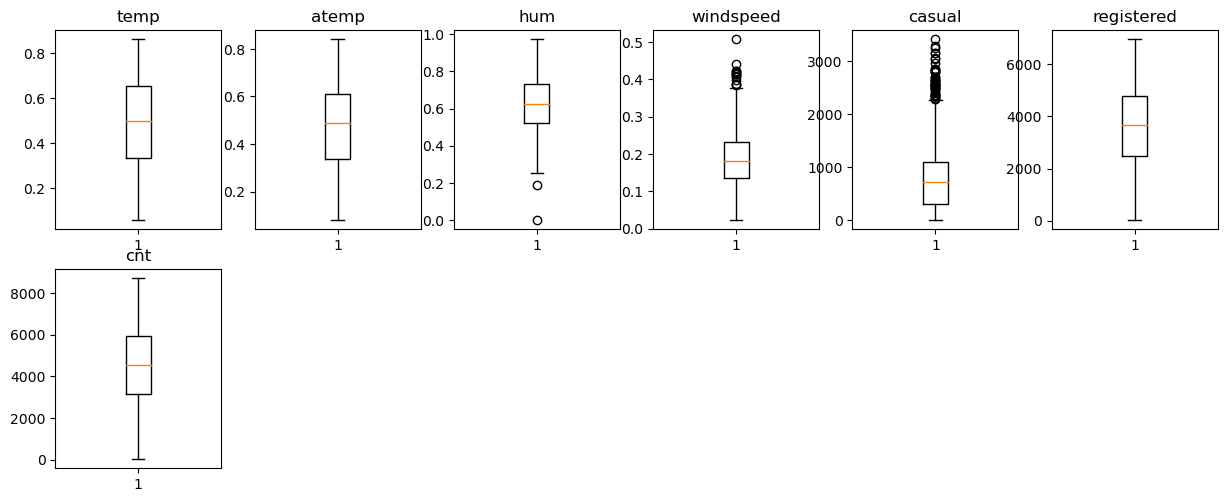

In [7]:
columns = ['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']

plt.subplots(figsize=(15,15))
for idx, name in enumerate(columns):
  plt.subplot(5, 6, idx + 1)
  plt.boxplot(day_df[name])
  plt.title(name)

In [8]:
selectedFeatures = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

outlier_info = {}

for index, name in enumerate(selectedFeatures):
    q1 = day_df[name].quantile(0.25)
    q3 = day_df[name].quantile(0.75)
    iqr = q3 - q1
    lowerbound = q1 - 1.5 * iqr
    upperbound = q3 + 1.5 * iqr
    outliers = day_df[(day_df[name] < lowerbound) | (day_df[name] > upperbound)]
    
    outlier_count = outliers.shape[0]
    
    total_rows = day_df.shape[0]
    outlier_percentage = (outlier_count / total_rows) * 100
    
    outlier_info[name] = {
        'outlier_count': outlier_count,
        'outlier_percentage': outlier_percentage
    }

outlier_info

{'temp': {'outlier_count': 0, 'outlier_percentage': 0.0},
 'atemp': {'outlier_count': 0, 'outlier_percentage': 0.0},
 'hum': {'outlier_count': 2, 'outlier_percentage': 0.27359781121751026},
 'windspeed': {'outlier_count': 13, 'outlier_percentage': 1.7783857729138166},
 'casual': {'outlier_count': 44, 'outlier_percentage': 6.019151846785226},
 'registered': {'outlier_count': 0, 'outlier_percentage': 0.0},
 'cnt': {'outlier_count': 0, 'outlier_percentage': 0.0}}

#### hour_df

In [9]:
print(hour_df.info())
print("="*50)
print(hour_df.isna().sum())
print("="*50)
print(f"Duplicate data: {hour_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
instant       0
dteday        0
season      

In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


C:\Users\Pramodia Suka\AppData\Local\Temp\ipykernel_6196\4168460823.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 6, idx + 1)


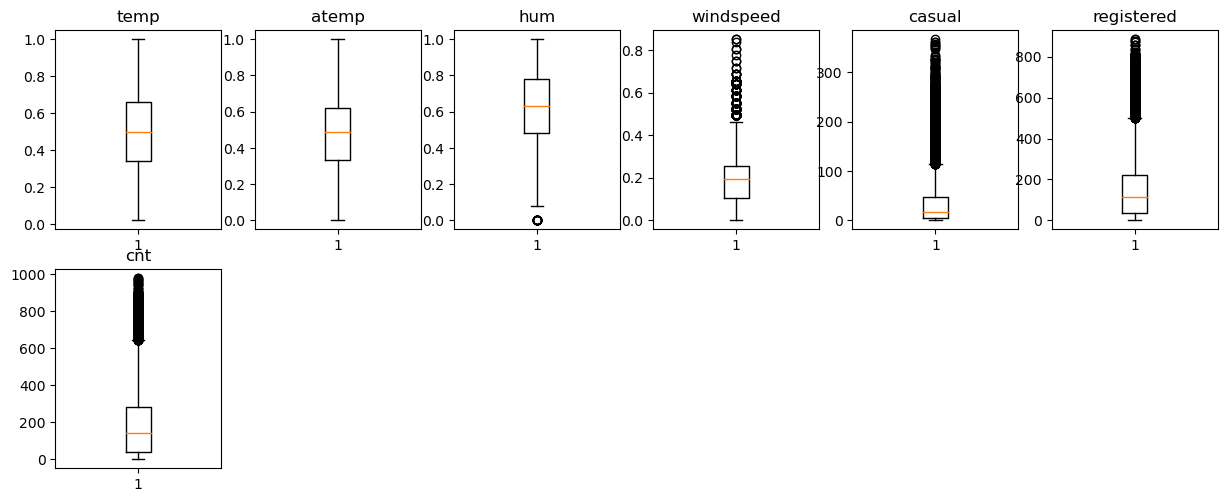

In [11]:
columns = ['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']

plt.subplots(figsize=(15,15))
for idx, name in enumerate(columns):
  plt.subplot(5, 6, idx + 1)
  plt.boxplot(hour_df[name])
  plt.title(name)

In [12]:
selectedFeatures = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

outlier_info = {}

for index, name in enumerate(selectedFeatures):
    q1 = hour_df[name].quantile(0.25)
    q3 = hour_df[name].quantile(0.75)
    iqr = q3 - q1
    lowerbound = q1 - 1.5 * iqr
    upperbound = q3 + 1.5 * iqr
    outliers = hour_df[(hour_df[name] < lowerbound) | (hour_df[name] > upperbound)]
    
    outlier_count = outliers.shape[0]
    
    total_rows = hour_df.shape[0]
    outlier_percentage = (outlier_count / total_rows) * 100
    
    outlier_info[name] = {
        'outlier_count': outlier_count,
        'outlier_percentage': outlier_percentage
    }

outlier_info

{'temp': {'outlier_count': 0, 'outlier_percentage': 0.0},
 'atemp': {'outlier_count': 0, 'outlier_percentage': 0.0},
 'hum': {'outlier_count': 22, 'outlier_percentage': 0.1265895621151965},
 'windspeed': {'outlier_count': 342, 'outlier_percentage': 1.9678922837907822},
 'casual': {'outlier_count': 1192, 'outlier_percentage': 6.858852638241555},
 'registered': {'outlier_count': 680,
  'outlier_percentage': 3.9127682835606192},
 'cnt': {'outlier_count': 505, 'outlier_percentage': 2.905805857644283}}

In [13]:
#Melihat jumlah data dengan nilai yang mencurigakan

zero_hum_day = (day_df['hum'] == 0).sum()
zero_hum_hour = (hour_df['hum'] == 0).sum()

print(f"Count hum=0 (day): {zero_hum_day}")
print(f"Count hum=0 (hour): {zero_hum_hour}")

Count hum=0 (day): 1
Count hum=0 (hour): 22


**Insight:**
- Pada day_df dan hour_df, kolom dteday masih berbentuk objek
- Ketiadaan nilai weathersit = 4 pada day_df
- Nilai terkecil dari feature hum pada day_df adalah 0. Hal ini tidak memungkinkan di dunia nyata.
- Pada hour_df, nilai terkecil dari feature hum adalah 0. Hal ini tidak memungkinkan di dunia nyata.
- Dapat dilihat bahwa jumlah data dengan nilai hum=0 pada day_df dan hour_df relatif sedikit, hal ini membuka kemungkinan bahwa terdapat kesalahan saat proses input data.
- Tidak ada missing value ataupun duplicate data pada kedua dataframe
- Pada day_df, terdapat outliers pada feature hum, windspeed, dan casual.
- Pada hour_df, terdapat outliers pada feature windspeed, casual, registered, dan cnt.

### Cleaning Data
Membersihkan data dengan cara mengubah tipe data pada suatu kolom dan mengatasi missing/incorect value.

#### Mengubah tipe data kolom dteday menjadi datetime

In [14]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

#### Menggunakan interpolasi linear untuk mengganti nilai hum=0 pada day_df dan hour_df
Interpolasi linear dipilih karena cocok dengan karakteristik dataset, yaitu timeseries data.

In [15]:
# Mengubah nilai hum menjadi NaN pada baris data dengan nilai hum=0

day_df['hum'] = day_df['hum'].mask(np.isclose(day_df['hum'], 0))
hour_df['hum'] = hour_df['hum'].mask(np.isclose(hour_df['hum'], 0))

print(f"Count day: {day_df['hum'].isna().sum()}")
print(f"Count hour: {hour_df.isna()['hum'].sum()}")

Count day: 1
Count hour: 22


In [16]:
# Menerapkan interpolasi linear pada feature hum pada day_df dan hour_df

day_df['hum'].interpolate(method ='linear', inplace=True)
hour_df['hum'].interpolate(method ='linear', inplace=True)

print(f"Count day: {day_df['hum'].isna().sum()}")
print(f"Count hour: {hour_df.isna()['hum'].sum()}")

Count day: 0
Count hour: 0


In [17]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628869,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140552,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [18]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628450,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192009,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tipe data pada kolom dteday berhasil diubah menjadi datetime.
- Baris data yang memiliki nilai hum = 0 pada day_df dan hour_df telah berhasil diubah dengan menggunakan interpolasi linear.
- Tidak diberlakukan proses outliers removal karena feature-feature pada kedua dataframe saling berkaitan.

## Exploratory Data Analysis (EDA)

#### EDA day_df

In [19]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
casual_count = day_df["casual"].sum()
registered_count = day_df["registered"].sum()

print(f"Total penyewaan sepeda oleh pengguna casual: {casual_count}")
print(f"Total penyewaan sepeda oleh pengguna terdaftar: {registered_count}")

Total penyewaan sepeda oleh pengguna casual: 620017
Total penyewaan sepeda oleh pengguna terdaftar: 2672662


In [21]:
# Jumlah penyewaan sepeda saat holiday atau tidak

day_df.groupby(by=["holiday"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

,cnt,casual,registered
holiday,,,
0,3214244,597658,2616586
1,78435,22359,56076


In [22]:
# Jumlah penyewaan sepeda saat working day atau tidak

day_df.groupby(by=["workingday"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

,cnt,casual,registered
workingday,,,
0,1000269,316732,683537
1,2292410,303285,1989125


In [23]:
# Jumlah penyewaan sepeda berdasarkan hari dan apakah hari tersebut holiday atau tidak

day_df.groupby(by=["weekday", "holiday"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

cnt  casual  registered
weekday holiday                            
0       0        444027  140521      303506
1       0        395898   54024      341874
        1         59605   16760       42845
2       0        468096   57403      410693
        1          1013     440         573
3       0        465645   54757      410888
        1          7403    2562        4841
4       0        481475   59945      421530
        1          3920    1515        2405
5       0        481296   77156      404140
        1          6494    1082        5412
6       0        477807  153852      323955

In [24]:
# Jumlah penyewaan sepeda berdasarkan hari dan apakah hari tersebut working day atau tidak

day_df.groupby(by=["weekday", "workingday"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

cnt  casual  registered
weekday workingday                            
0       0           444027  140521      303506
1       0            59605   16760       42845
        1           395898   54024      341874
2       0             1013     440         573
        1           468096   57403      410693
3       0             7403    2562        4841
        1           465645   54757      410888
4       0             3920    1515        2405
        1           481475   59945      421530
5       0             6494    1082        5412
        1           481296   77156      404140
6       0           477807  153852      323955

In [25]:
# Jumlah penyewaan sepeda berdasarkan kondisi cuaca

day_df.groupby(by=["weathersit"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

,cnt,casual,registered
weathersit,,,
1,2257952,446346,1811606
2,996858,169776,827082
3,37869,3895,33974


#### hour_df

In [26]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
# Jumlah penyewaan sepeda saat holiday atau tidak

hour_df.groupby(by=["holiday"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

,cnt,casual,registered
holiday,,,
0,3214244,597658,2616586
1,78435,22359,56076


In [28]:
# Jumlah penyewaan sepeda saat workingday atau tidak

hour_df.groupby(by=["workingday"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

,cnt,casual,registered
workingday,,,
0,1000269,316732,683537
1,2292410,303285,1989125


In [29]:
# Jumlah penyewaan sepeda berdasarkan hari dan apakah hari tersebut holiday atau tidak

hour_df.groupby(by=["weekday", "holiday"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

cnt  casual  registered
weekday holiday                            
0       0        444027  140521      303506
1       0        395898   54024      341874
        1         59605   16760       42845
2       0        468096   57403      410693
        1          1013     440         573
3       0        465645   54757      410888
        1          7403    2562        4841
4       0        481475   59945      421530
        1          3920    1515        2405
5       0        481296   77156      404140
        1          6494    1082        5412
6       0        477807  153852      323955

In [30]:
# Jumlah penyewaan sepeda berdasarkan hari dan apakah hari tersebut working day atau tidak

hour_df.groupby(by=["weekday", "workingday"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

cnt  casual  registered
weekday workingday                            
0       0           444027  140521      303506
1       0            59605   16760       42845
        1           395898   54024      341874
2       0             1013     440         573
        1           468096   57403      410693
3       0             7403    2562        4841
        1           465645   54757      410888
4       0             3920    1515        2405
        1           481475   59945      421530
5       0             6494    1082        5412
        1           481296   77156      404140
6       0           477807  153852      323955

In [31]:
# Jumlah penyewaan sepeda berdasarkan kondisi cuaca

hour_df.groupby(by=["weathersit"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

,cnt,casual,registered
weathersit,,,
1,2338173,462745,1875428
2,795952,134481,661471
3,158331,22783,135548
4,223,8,215


In [32]:
# Jumlah penyewaan sepeda berdasaarkan jam penyewaan

hour_df.groupby(by=["hr"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

,cnt,casual,registered
hr,,,
0,39130,7375,31755
1,24164,4709,19455
2,16352,3412,12940
3,8174,1893,6281
4,4428,874,3554
5,14261,1012,13249
6,55132,3017,52115
7,154171,8037,146134
8,261001,15761,245240


In [33]:
# Jumlah penyewaan sepeda berdasarkan jam penyewaan dan apakah hari tersebut working day atau tidak

hour_df.groupby(by=["hr", "workingday"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

cnt  casual  registered
hr workingday                            
0  0            20884    3829       17055
   1            18246    3546       14700
1  0            15987    2876       13111
   1             8177    1833        6344
2  0            12123    2371        9752
   1             4229    1041        3188
3  0             5851    1465        4386
   1             2323     428        1895
4  0             1876     514        1362
   1             2552     360        2192
5  0             1929     383        1546
   1            12332     629       11703
6  0             4292     875        3417
   1            50840    2142       48698
7  0            10027    1988        8039
   1           144144    6049      138095
8  0            24406    4718       19688
   1           236595   11043      225552
9  0            39645   10399       29246
   1           119793   12059      107734
10 0            59115   18311       40804
   1            67142   15478       51664
11 0            72838   24637       48201
   1            78482   18649       59833
12 0            84606   29163       55443
   1            99808   20555       79253
13 0            86101   31514       54587
   1            98818   21199       77619
14 0            84233   32246       51987
   1            91419   22843       68576
15 0            82886   31532       51354
   1           100263   23074       77189
16 0            81480   29710       51770
   1           146268   24124      122144
17 0            74740   25829       48911
   1           262120   28391      233729
18 0            64643   19371       45272
   1           245129   25125      220004
19 0            53285   15076       38209
   1           173504   20429      153075
20 0            40190   10756       29434
   1           124360   15622      108738
21 0            32674    8314       24360
   1            92771   12256       80515
22 0            26694    6453       20241
   1            68918    9747       59171
23 0            19764    4402       15362
   1            44177    6663       37514

**Insight:**
- Jumlah penyewaan sepeda oleh pengguna terdaftar lebih banyak daripada pengguna casual.
- Jumlah penyewaan sepeda pada hari kerja lebih banyak daripada bukan hari kerja.
- Jumlah penyewaan sepeda pada hari libur (holiday) lebih sedikit daripada bukan hari libur.
- Jumlah penyewaan sepeda pada hari kamis kerja lebih banyak daripada hari yang lain.
- Jumlah penyewaan sepeda terbanyak pada hari libur jatuh pada hari senin.
- Kondisi cuaca jenis 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) memiliki jumlah penyewaan sepeda terbanyak daripada kondisi cuaca jenis lain.
- Jam 7 hingga 21 menjadi rentang waktu penyewaan sepeda yang tergolong banyak (lebih dari 100000 penyewaan)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh hari libur dan hari kerja terhadap rata-rata jumlah penyewaan sepeda?

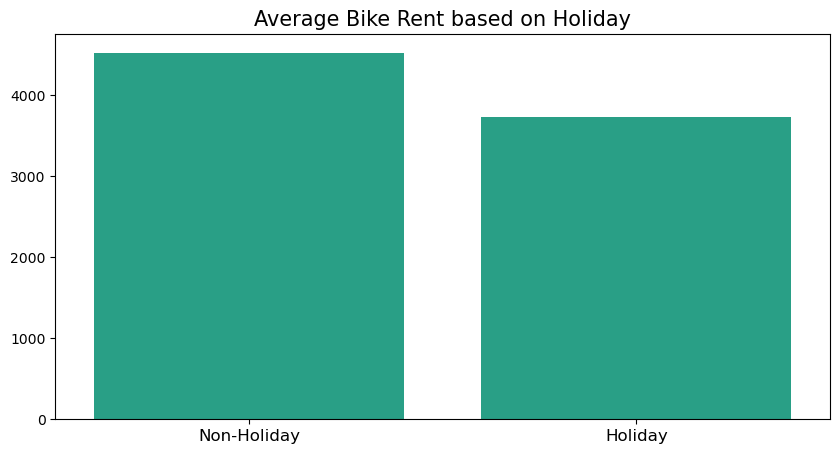

In [34]:
holiday_df = day_df.groupby(by=["holiday"]).agg({
    "cnt": "mean"
}).reset_index()

holiday_df["holiday"] = holiday_df['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})
holiday_df

plt.figure(figsize=(10,5))

sns.barplot(y="cnt",
           x="holiday",
           data=holiday_df,
           color="#15B392")

plt.title("Average Bike Rent based on Holiday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

<Figure size 1000x500 with 0 Axes>

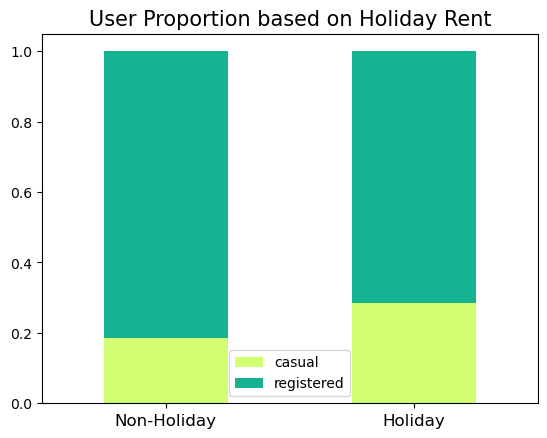

In [35]:
proportioned_holiday_df = day_df.groupby(by=["holiday"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}).reset_index()

proportioned_holiday_df["holiday"] = proportioned_holiday_df['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})
proportioned_holiday_df[["casual", "registered"]] = proportioned_holiday_df[['casual', 'registered']].div(proportioned_holiday_df['cnt'], axis=0)
proportioned_holiday_df.drop('cnt', axis=1, inplace=True)
proportioned_holiday_df

plt.figure(figsize=(10,5))

proportioned_holiday_df.set_index('holiday').plot(kind='bar', stacked=True, color=['#D2FF72', '#15B392'])

plt.title("User Proportion based on Holiday Rent", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12, rotation=0)
plt.show()

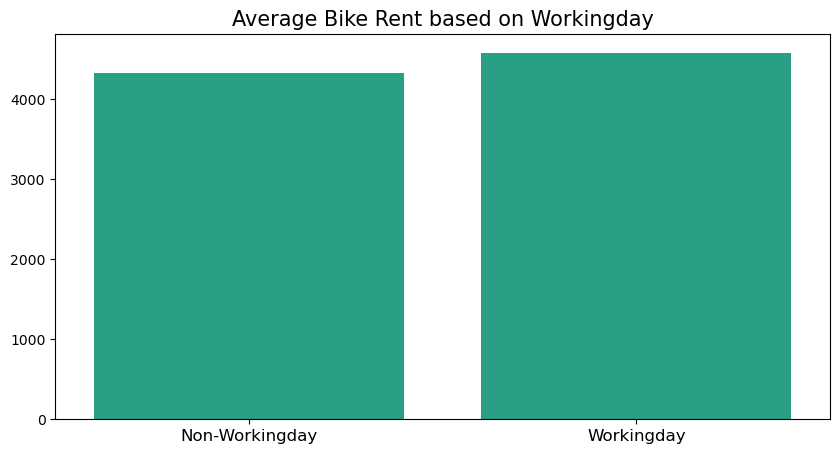

In [36]:
workingday_df = day_df.groupby(by=["workingday"]).agg({
    "cnt": "mean"
}).reset_index()

workingday_df["workingday"] = workingday_df['workingday'].map({0: 'Non-Workingday', 1: 'Workingday'})

plt.figure(figsize=(10,5))

sns.barplot(y="cnt",
           x="workingday",
           data=workingday_df,
           color="#15B392")

plt.title("Average Bike Rent based on Workingday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

<Figure size 1000x500 with 0 Axes>

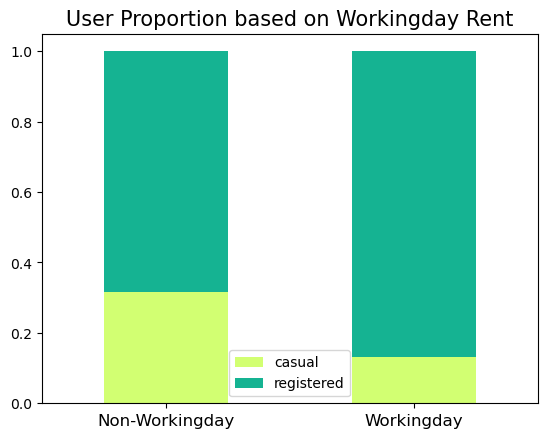

In [37]:
proportioned_workingday_df = day_df.groupby(by=["workingday"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}).reset_index()

proportioned_workingday_df["workingday"] = proportioned_workingday_df['workingday'].map({0: 'Non-Workingday', 1: 'Workingday'})
proportioned_workingday_df[["casual", "registered"]] = proportioned_workingday_df[['casual', 'registered']].div(proportioned_workingday_df['cnt'], axis=0)
proportioned_workingday_df.drop('cnt', axis=1, inplace=True)

plt.figure(figsize=(10,5))

proportioned_workingday_df.set_index('workingday').plot(kind='bar', stacked=True, color=['#D2FF72', '#15B392'])

plt.title("User Proportion based on Workingday Rent", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12, rotation=0)
plt.show()

### Pertanyaan 2: Kapan jam puncak penyewaan sepeda pada hari kerja?

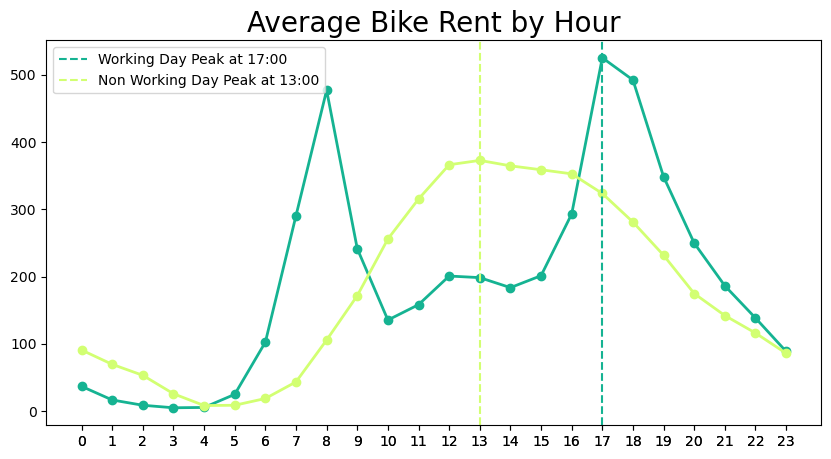

In [38]:
# Rata-rata penyewaan sepeda berdasaarkan jam penyewaan

peak_df = hour_df.groupby(by=["hr", "workingday"]).agg({
    "cnt": "mean"
}).reset_index()

workingday_peak = peak_df[peak_df["workingday"] == 1]
non_workingday_peak = peak_df[peak_df["workingday"] == 0]

working_peak_hour = workingday_peak.loc[workingday_peak["cnt"].idxmax(), "hr"]
non_working_peak_hour = non_workingday_peak.loc[non_workingday_peak["cnt"].idxmax(), "hr"]

plt.figure(figsize=(10,5))
plt.plot(workingday_peak["hr"], workingday_peak["cnt"], marker="o", linewidth=2, color="#15B392")
plt.plot(non_workingday_peak["hr"], non_workingday_peak["cnt"], marker="o", linewidth=2, color="#D2FF72")

plt.axvline(x=working_peak_hour, color='#15B392', linestyle='--', label=f"Working Day Peak at {working_peak_hour}:00")
plt.axvline(x=non_working_peak_hour, color='#D2FF72', linestyle='--', label=f"Non Working Day Peak at {non_working_peak_hour}:00")

plt.title("Average Bike Rent by Hour", loc="center", fontsize=20)
plt.xticks(peak_df["hr"], fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

C:\Users\Pramodia Suka\AppData\Local\Temp\ipykernel_6196\2962343529.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=10)
C:\Users\Pramodia Suka\AppData\Local\Temp\ipykernel_6196\2962343529.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(ax[1].get_yticks(), fontsize=10)


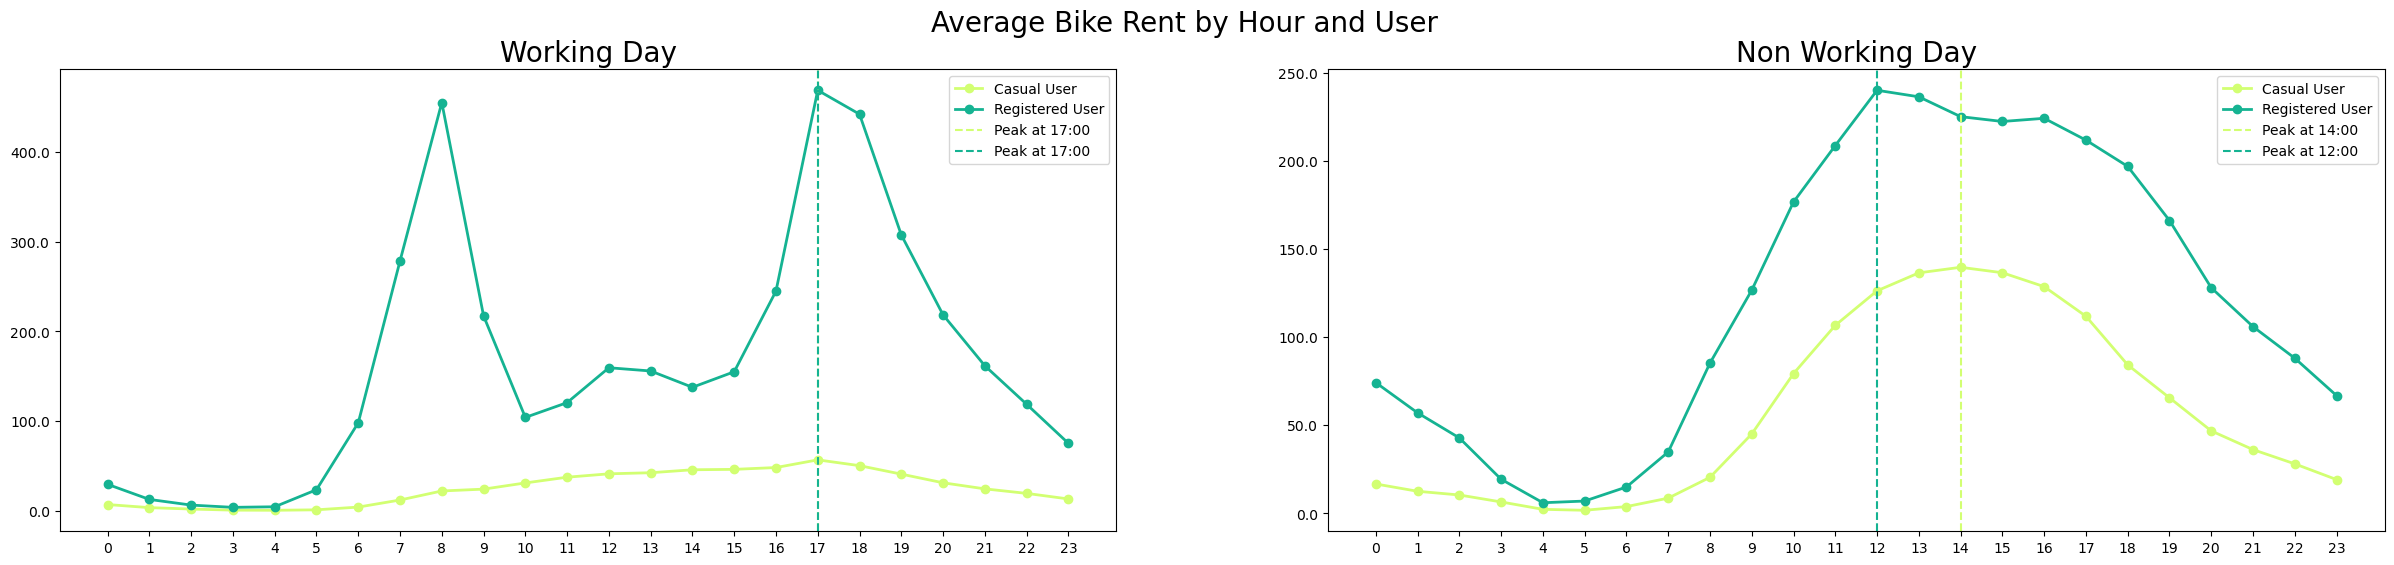

In [39]:
# Rata-rata penyewaan sepeda berdasaarkan jam penyewaan

peak_df = hour_df.groupby(by=["hr", "workingday"]).agg({
    "casual": "mean",
    "registered": "mean"
}).reset_index()

workingday_peak = peak_df[peak_df["workingday"] == 1]
non_workingday_peak = peak_df[peak_df["workingday"] == 0]

workingday_peak_casual = workingday_peak.loc[workingday_peak["casual"].idxmax(), "hr"]
workingday_peak_registered = workingday_peak.loc[workingday_peak["registered"].idxmax(), "hr"]

non_workingday_peak_casual = non_workingday_peak.loc[non_workingday_peak["casual"].idxmax(), "hr"]
non_workingday_peak_registered = non_workingday_peak.loc[non_workingday_peak["registered"].idxmax(), "hr"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,6))

# WORKING DAY
ax[0].plot(workingday_peak["hr"], workingday_peak["casual"], marker="o", linewidth=2, color="#D2FF72", label="Casual User")
ax[0].plot(workingday_peak["hr"], workingday_peak["registered"], marker="o", linewidth=2, color="#15B392", label="Registered User")

ax[0].axvline(x=workingday_peak_casual, color='#D2FF72', linestyle='--', label=f"Peak at {workingday_peak_casual}:00")
ax[0].axvline(x=workingday_peak_registered, color='#15B392', linestyle='--', label=f"Peak at {workingday_peak_registered}:00")

ax[0].set_title("Working Day", loc="center", fontsize=20)
ax[0].set_xticks(peak_df["hr"].unique())
ax[0].set_xticklabels(peak_df["hr"].unique(), fontsize=10)
ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=10)
ax[0].legend()

# NON WORKING DAY
ax[1].plot(non_workingday_peak["hr"], non_workingday_peak["casual"], marker="o", linewidth=2, color="#D2FF72", label="Casual User")
ax[1].plot(non_workingday_peak["hr"], non_workingday_peak["registered"], marker="o", linewidth=2, color="#15B392", label="Registered User")

ax[1].axvline(x=non_workingday_peak_casual, color='#D2FF72', linestyle='--', label=f"Peak at {non_workingday_peak_casual}:00")
ax[1].axvline(x=non_workingday_peak_registered, color='#15B392', linestyle='--', label=f"Peak at {non_workingday_peak_registered}:00")

ax[1].set_title("Non Working Day", loc="center", fontsize=20)
ax[1].set_xticks(peak_df["hr"].unique())
ax[1].set_xticklabels(peak_df["hr"].unique(), fontsize=10)
ax[1].set_yticklabels(ax[1].get_yticks(), fontsize=10)
ax[1].legend()

plt.suptitle("Average Bike Rent by Hour and User", fontsize=20)
plt.show()

### Pertanyaan 3: Bagaimana pengaruh kondisi cuaca terhadap rata-rata jumlah penyewaan sepeda?

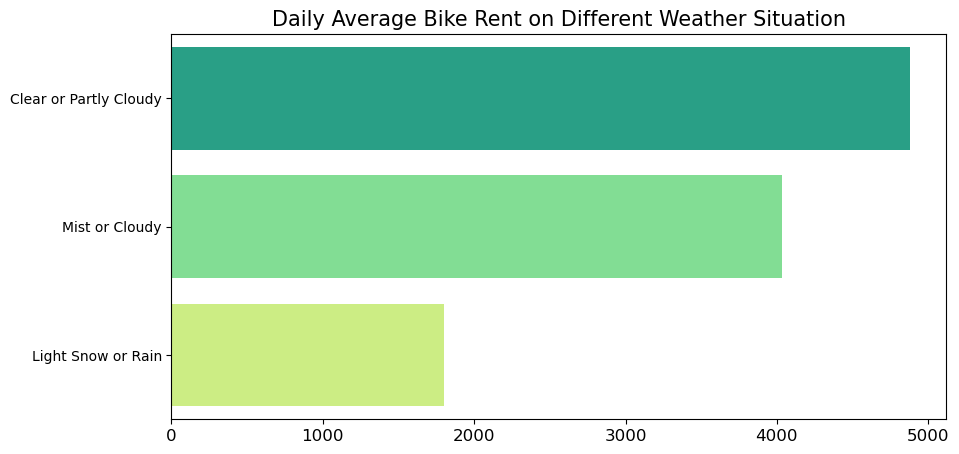

In [40]:
# Rata rata penyewaan sepeda harian berdasarkan kondisi cuaca

day_weathersit_df = day_df.groupby(by=["weathersit"]).agg({
    "cnt": "mean"
}).reset_index()

day_weathersit_df["weathersit"] = day_weathersit_df["weathersit"].map({1: 'Clear or Partly Cloudy', 
                                                                       2: 'Mist or Cloudy', 
                                                                       3: 'Light Snow or Rain'})

plt.figure(figsize=(10,5))
colors_ = ["#15B392", "#73EC8B", "#D2FF72"]
sns.barplot(x="cnt",
           y="weathersit",
           data=day_weathersit_df.sort_values(by="cnt", ascending=False),
           palette=colors_,
           orient="h")

plt.title("Daily Average Bike Rent on Different Weather Situation", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

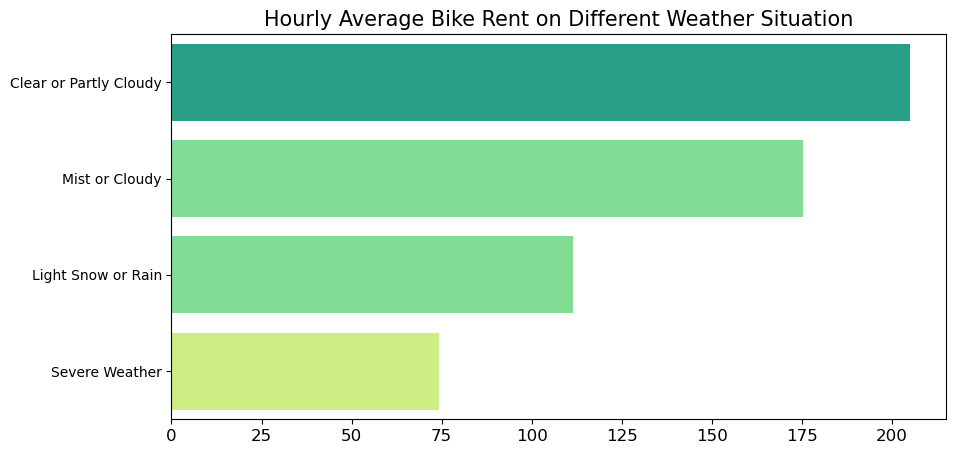

In [41]:
# Rata rata penyewaan sepeda berdasarkan kondisi cuaca per jam

hour_weathersit_df = hour_df.groupby(by=["weathersit"]).agg({
    "cnt": "mean"
}).reset_index()

# Mapping dilakukan untuk keperluan visualisasi data
hour_weathersit_df["weathersit"] = hour_weathersit_df["weathersit"].map({1: 'Clear or Partly Cloudy', 
                                                                       2: 'Mist or Cloudy', 
                                                                       3: 'Light Snow or Rain',
                                                                       4: 'Severe Weather'})

plt.figure(figsize=(10,5))
colors_ = ["#15B392", "#73EC8B", "#73EC8B", "#D2FF72"]
sns.barplot(x="cnt",
           y="weathersit",
           data=hour_weathersit_df.sort_values(by="cnt", ascending=False),
           palette=colors_,
           orient="h")

plt.title("Hourly Average Bike Rent on Different Weather Situation", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Jumlah penyewaan sepeda pada hari libur cenderung lebih sedikit dibangdingkan dengan bukan hari libur.
- Orang yang menyewa sepeda pada hari kerja cenderung lebih banyak daripada dibandingkan dengan bukan hari kerja. 
- Berdasarkan grafik "User Proportion on Based on Holiday Rent", dapat diketahui bahwa hari libur mempengaruhi peningkatan penggunaan sewa sepeda oleh pengguna casual.
- Puncak penyewaan sepeda pada hari kerja terjadi pada jam 17:00. Sedangkan, pada hari yang bukan hari kerja, puncak penyewaan sepeda terjadi pada jam 13:00. 
- Peningkatan jumlah sewa sepeda yang signifikan terlihat pada jam masuk kantor, yaitu jam 06:00 hingga 08:00 dan jam pulang kantor, yaitu 16:00 hingga 17:00. Sedangkan, pada hari yang bukan hari kerja, jumlah sewa mengalami peningkatan setelah jam 05:00 dan terus meningkat secara perlahan hingga mencapai puncaknya pada 13:00. Setelah jam 13:00, jumlah sewa mengalami penurunan secara perlahan. 
- Berdasarkan grafik "Average Bike Rent by Hour and User", dapat dilihat pola penyewaan registered user pada hari kerja sama dengan pola penyewaan sepeda pada hari kerja secara keseluruhan.
- Kondisi cuaca berpengaruh terhadap jumlah penyewaan sepeda. Hal ini dapat dilihat dari dua grafik, yaitu "Daily Average Bike Rent on Different Weather Situation" dan "Hourly Average Bike Rent on Different Weather Situation". Penyewaan sepeda lebih banyak terjadi ketika cuaca cerah atau berawan sebagian dan jumlah penyewaan terendah terjadi ketika cuaca buruk.

## Analisis Lanjutan (Opsional)

### Pertanyaan 4: Bagaimana pengaruh feeling temperature terhadap rata-rata jumlah penyewaan sepeda pada tingkat harian?

#### Clustering (Manual Grouping)
Untuk menjawab pertanyaan 4, dilakukan proses manual grouping untuk mengelompokkan nilai feeling temperature (atemp) ke dalam 5 grup, yaitu Safe, Caution, Extreme Caution, Danger, dan Extreme Danger.
Informasi ini didapat dari:
https://www.weather.gov/ama/heatindex#:~:text=The%20heat%20index%2C%20also%20known%20as%20the%20apparent,to%20perspire%20or%20sweat%20to%20cool%20itself%20off.

In [42]:
cluster_df = day_df.copy(deep=True)

# Mengubah nilai feature atemp menjadi 5 kategori.
cluster_df.loc[day_df["atemp"] < (26.67/50), "atemp"] = "Safe"
cluster_df.loc[(day_df["atemp"] >= (26.67/50)) & (day_df["atemp"] < (32.22/50)), "atemp"] = "Caution"
cluster_df.loc[(day_df["atemp"] >= (32.22/50)) & (day_df["atemp"] < (39.44/50)), "atemp"] = "Extreme Caution"
cluster_df.loc[(day_df["atemp"] >= (39.44/50)) & (day_df["atemp"] < (51.11/50)), "atemp"] = "Danger"
cluster_df.loc[day_df["atemp"] > (51.67/50), "atemp"] = "Extreme Danger"

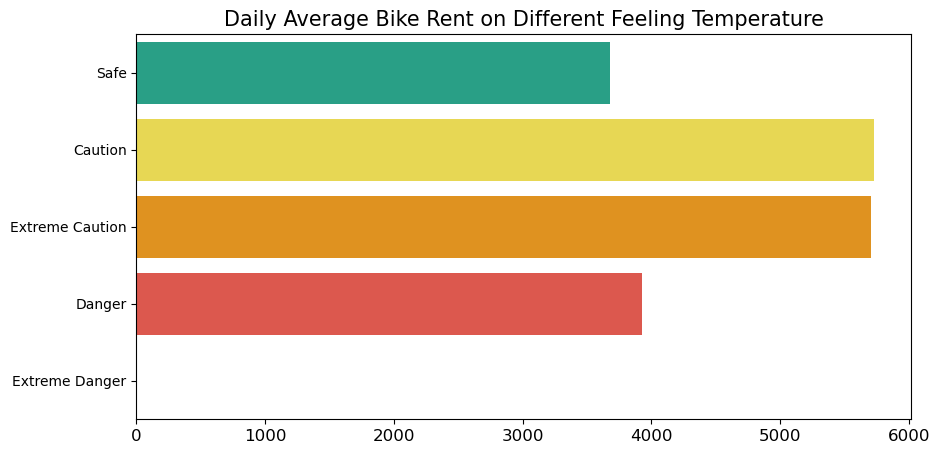

In [43]:
# Rata rata penyewaan sepeda harian berdasarkan feeling temperature

atemp_df = cluster_df.groupby(by=["atemp"]).agg({
    "cnt": "mean"
}).reset_index()

order = ["Safe", "Caution", "Extreme Caution", "Danger", "Extreme Danger"]
atemp_df["atemp"] = pd.Categorical(atemp_df["atemp"], categories=order, ordered=True)

plt.figure(figsize=(10,5))
colors_ = ["#15B392", "#FFEB3B", "#FF9800", "#F44336", "#D32F2F"]
sns.barplot(x="cnt",
           y="atemp",
           data=atemp_df,
           palette=colors_,
           orient="h")

plt.title("Daily Average Bike Rent on Different Feeling Temperature", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Kondisi Caution dan Extreme Caution memilki rata-rata penyewaan sepeda lebih besar daripada safe dan danger. Hal ini menandakan pengguna masih nyaman merasa sedikit panas untuk mengendarai sepeda.
- Extreme Danger bernilai 0 karena tidak ada nilai atemp yang melebihi 50 derajat celcius pada dataset.
- Kondisi Safe tidak memiliki rata-rata penyewaan sepeda tertinggi. Hal ini menandakan kondisi nyaman atau safe tidak selalu berkolerasi dengan penambahan jumlah penyewaan sepeda.
- Masih terdapat penyewaan sepeda saat kondisi Danger, namun tidak setinggi kondisi Extreme Caution. Hal ini menandakan pengguna masih berpikir dua kali untuk menggunakan sepeda saat kondisi Danger. 

## Conclusion

- Pertanyaan 1: Hari Libur berpengaruh terhadap jumlah penyewaan sepeda. Jumlah penyewaan sepeda pada hari libur cenderung lebih sedikit dibangdingkan dengan bukan hari libur. Hari kerja juga berpengaruh terhadap jumlah penyewaan sepeda. Orang yang menyewa sepeda pada hari kerja cenderung lebih banyak daripada dibandingkan dengan bukan hari kerja. Hal ini menandakan masyarakat cenderung menggunakan jasa penyewaan sepeda untuk moda transportasi bekerja. Berdasarkan grafik "User Proportion on Based on Holiday Rent", dapat diketahui bahwa hari libur mempengaruhi peningkatan penggunaan sewa sepeda oleh pengguna casual.
- Pertanyaan 2: Puncak penyewaan sepeda pada hari kerja terjadi pada jam 17:00. Sedangkan, pada hari yang bukan hari kerja, puncak penyewaan sepeda terjadi pada jam 13:00. Peningkatan jumlah sewa sepeda yang signifikan terlihat pada jam masuk kantor, yaitu jam 06:00 hingga 08:00 dan jam pulang kantor, yaitu 16:00 hingga 17:00. Sedangkan, pada hari yang bukan hari kerja, jumlah sewa mengalami peningkatan setelah jam 05:00 dan terus meningkat secara perlahan hingga mencapai puncaknya pada 13:00. Setelah jam 13:00, jumlah sewa mengalami penurunan secara perlahan. Berdasarkan grafik "Average Bike Rent by Hour and User", dapat dilihat pola penyewaan registered user pada hari kerja sama dengan pola penyewaan sepeda pada hari kerja secara keseluruhan. Hal ini menandakan bahwa pengguna yang terdaftar (registered user) merupakakan pekerja.
- Pertanyaan 3: Kondisi cuaca berpengaruh terhadap jumlah penyewaan sepeda. Hal ini dapat dilihat dari dua grafik, yaitu "Daily Average Bike Rent on Different Weather Situation" dan "Hourly Average Bike Rent on Different Weather Situation". Penyewaan sepeda lebih banyak terjadi ketika cuaca cerah atau berawan sebagian dan jumlah penyewaan terendah terjadi ketika cuaca buruk.
- Pertanyaan 4: Feeling temperature berpengaruh terhadap rata-rata jumlah penyewaan sepeda pada tingkat harian. Penyewaan sepeda lebih banyak terjadi ketika kondisi feeling temperature adalah Caution dan Extreme Caution. Hal ini menandakan bahwa pengguna masih nyaman untuk bersepeda pada kondisi ini. Sedangkan, kondisi Safe dan Danger menurunkan jumlah penyewaan sepeda.

## Export Data

In [44]:
day_df.to_csv(r"C:\Users\Pramodia Suka\Notebook\Bangkit\Analisis Data Python\data\day_processed.csv", index=False)
hour_df.to_csv(r"C:\Users\Pramodia Suka\Notebook\Bangkit\Analisis Data Python\data\hour_processed.csv", index=False)
cluster_df.to_csv(r"C:\Users\Pramodia Suka\Notebook\Bangkit\Analisis Data Python\data\clustered_atemp.csv", index=False)